#**Assignment 3 and Project** 
**Big Data AnaLytics**


---



2.   Khadija Mahmood [i21-2313]      
            
                  



 

#Introduction

---

**Learning Goals & Outcomes**
To Learn to analyze substantial real-world big data of a social network (1.69GB in
size).
o Explore effective use of Apache Kafka to process data.
o Applying graph mining algorithms on streaming data.
o Dynamic Visualizations.



##Input Data

Pokec is the most popular online social network in Slovakia. Pokec has been
provided for more than 10 years and connects more than 1.6 million people. Datasets
contain anonymized data of the whole network. Profile data contains gender, age,
hobbies, interest, education, etc. Profile data are in the Slovak language. Friendships in
Pokec are oriented.
This social network has connected more than 1.6 million people and posses more
than 50 attributes for each person.

#Task 3: Data Visualization

#Installation of librarires

In [ ]:
!pip install firebase
!pip install python_jwt 
!pip install gcloud
!pip install sseclient
!pip install pycryptodome
! pip install requests_toolbelt

#Firebase Connection

In [ ]:
from firebase import firebase
FBconn=firebase.FirebaseApplication("https://bda-project-bb362-default-rtdb.firebaseio.com/",None)
FBconn2=firebase.FirebaseApplication("https://graph-f324a-default-rtdb.firebaseio.com/",None)

Column values

In [ ]:
lst=['gender', 'AGE', 'actual_region', 'actual_hair_color', 'actual_spoken',
       'actual_height_cm', 'actual_eye_color', 'actual_relation_to_alcohol',
       'registration_year', 'actual_my_eyesight']
dict1

{'gender': 'data1',
 'AGE': 'data2',
 'actual_region': '',
 'actual_hair_color': '',
 'actual_spoken': '',
 'actual_height_cm': '',
 'actual_eye_color': '',
 'actual_relation_to_alcohol': '',
 'registration_year': '',
 'actual_my_eyesight': ''}

In [ ]:
for x in range(1,6):
    FBconn.post("/MyTestData",dict1)

importing files

In [ ]:
from kafka import KafkaConsumer
from json import loads
import json
import pandas as pd

In [ ]:
import numpy as np

Creating object of consumer

In [ ]:
consumer = KafkaConsumer('test',bootstrap_servers='localhost:9092',value_deserializer=lambda x:loads(x.decode('utf-8')))

#Getting streaming data from Firebase

In [ ]:
temp=[]
for message in consumer:
    if(message.value=="display"):
        consumer.close()
    else:
        temp=str(message.value).split(',')
        dict1 = {lst[0]: temp[0],lst[1]: temp[1],lst[2]:temp[2],lst[3]:temp[3],lst[4]:temp[4],lst[5]:temp[5],lst[6]:temp[6],lst[7]:temp[7],lst[8]:temp[8],lst[9]:temp[9]}
        FBconn.post("/MyTestData",dict1)
        print(message.value)



30,1,12,1,zilinsky kraj, kysucke nove mesto,12:00.0,30,00:00.0,21,nan
79,1,71,1,zilinsky kraj, kysucke nove mesto,46:00.0,79,00:00.0,23,181 cm, 70 kg
92,1,71,0,zilinsky kraj, kysucke nove mesto,38:00.0,92,00:00.0,22,nan
44,0,19,1,zilinsky kraj, kysucke nove mesto,16:00.0,44,00:00.0,0,183 cm, 97 kg
68,1,19,0,zilinsky kraj, kysucke nove mesto,53:00.0,68,00:00.0,0,nan
80,1,60,0,zahranicie, zahranicie - ostatne,00:00.0,80,00:00.0,24,175 cm, 52 kg
93,1,60,1,zilinsky kraj, kysucke nove mesto,13:00.0,93,00:00.0,21,nan
106,1,64,1,zilinsky kraj, kysucke nove mesto,36:00.0,106,00:00.0,22,nan
94,1,14,1,zahranicie, zahranicie - nemecko,32:00.0,94,00:00.0,20,nan
95,1,14,1,zilinsky kraj, zilina,18:00.0,95,00:00.0,23,nan
81,0,21,1,zilinsky kraj, kysucke nove mesto,28:00.0,81,00:00.0,25,nan
96,1,53,0,zilinsky kraj, kysucke nove mesto,19:00.0,96,00:00.0,21,172 cm
107,1,67,1,zilinsky kraj, kysucke nove mesto,50:00.0,107,00:00.0,24,nan
82,0,28,0,zilinsky kraj, kysucke nove mesto,05:00.0,82,00:00.0,20,nan

KeyboardInterrupt: 

#Visualization of Relationship graph against every key

we visualize data of every relationship by their ids, like there will be updation in graph as id 1 get new values contineously

<IPython.core.display.Javascript object>


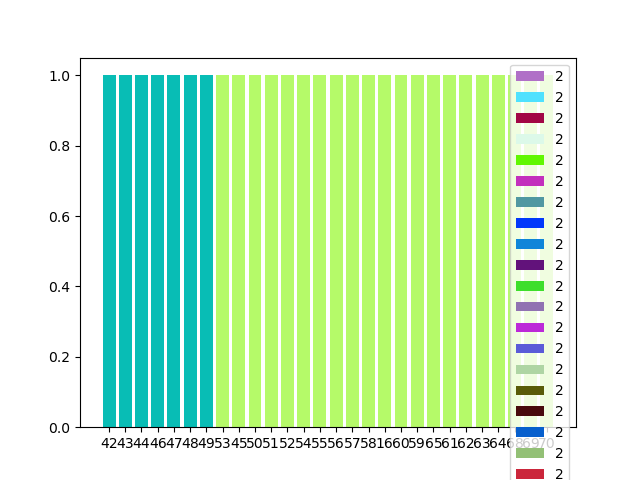

2,42
2,43
2,44
2,46
2,47
2,48
2,49
2,53
2,45
2,50
2,51
2,52
2,54
2,55
2,56
2,57
2,58
2,16
2,60
2,59
2,65
2,61
2,62
2,63
2,64
2,68
2,69
2,70


KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import random
temp=[]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
from collections import defaultdict
mydict = defaultdict(list)
for message in consumer:
    if(message.value=="display"):
        consumer.close()
    else:
        temp=str(message.value).split(',')
        dict1 = {"Key": temp[0],"Value": temp[1]}
        #FBconn2.post("/MyTestData",dict1)
        mydict[temp[0]].append(temp[1])
        for k,l in mydict.items():
            labeled = False
            c=random.rand(3,)
            for v in l:
                if labeled:
                    ax.bar(v,len([d for d in l if d==v]),color=c)
                    fig.canvas.draw()
                else:
                    ax.bar(v,len([d for d in l if d==v]),label=k,color=c)
                    labeled = True
                    fig.canvas.draw()

        plt.legend()
        plt.show()
        print(message.value)
        
        

#Stream Bar Plot

<IPython.core.display.Javascript object>


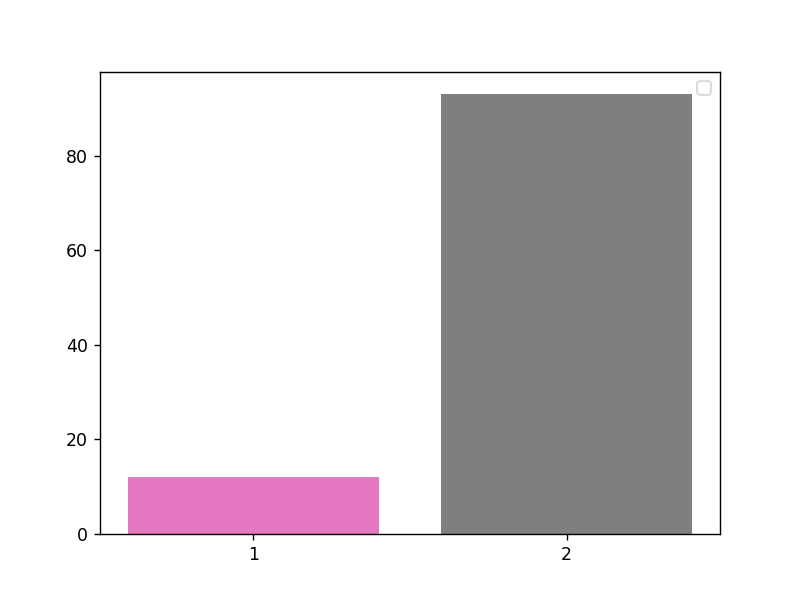

No handles with labels found to put in legend.
No handles with labels found to put in legend.


1,11
1,6


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1,5
1,15
1,4


No handles with labels found to put in legend.


1,14


No handles with labels found to put in legend.


1,7


No handles with labels found to put in legend.


1,8


No handles with labels found to put in legend.


1,12


No handles with labels found to put in legend.


1,9


No handles with labels found to put in legend.


1,10


No handles with labels found to put in legend.


1,16


No handles with labels found to put in legend.


2,1


No handles with labels found to put in legend.


2,18


No handles with labels found to put in legend.


2,19


No handles with labels found to put in legend.


2,20


No handles with labels found to put in legend.


2,21


No handles with labels found to put in legend.


2,22


No handles with labels found to put in legend.


2,23


No handles with labels found to put in legend.


2,24


No handles with labels found to put in legend.


2,25


No handles with labels found to put in legend.


2,26


No handles with labels found to put in legend.


2,27


No handles with labels found to put in legend.


2,28


No handles with labels found to put in legend.


2,29


No handles with labels found to put in legend.


2,30


No handles with labels found to put in legend.


2,31


No handles with labels found to put in legend.


2,32


No handles with labels found to put in legend.


2,33


No handles with labels found to put in legend.


2,34


No handles with labels found to put in legend.


2,35


No handles with labels found to put in legend.


2,36


No handles with labels found to put in legend.


2,37


No handles with labels found to put in legend.


2,38


No handles with labels found to put in legend.


2,39


No handles with labels found to put in legend.


2,40


No handles with labels found to put in legend.


2,41


No handles with labels found to put in legend.


2,42


No handles with labels found to put in legend.


2,43


No handles with labels found to put in legend.


2,44


No handles with labels found to put in legend.


2,45


No handles with labels found to put in legend.


2,46


No handles with labels found to put in legend.


2,47


No handles with labels found to put in legend.


2,48


No handles with labels found to put in legend.


2,49


No handles with labels found to put in legend.


2,50


No handles with labels found to put in legend.


2,51


No handles with labels found to put in legend.


2,52


No handles with labels found to put in legend.


2,53


No handles with labels found to put in legend.


2,54


No handles with labels found to put in legend.


2,55


No handles with labels found to put in legend.


2,56


No handles with labels found to put in legend.


2,57


No handles with labels found to put in legend.


2,58


No handles with labels found to put in legend.


2,16


No handles with labels found to put in legend.


2,59


No handles with labels found to put in legend.


2,60


No handles with labels found to put in legend.


2,61


No handles with labels found to put in legend.


2,62


No handles with labels found to put in legend.


2,63


No handles with labels found to put in legend.


2,64


No handles with labels found to put in legend.


2,65


No handles with labels found to put in legend.


2,66


No handles with labels found to put in legend.


2,67


No handles with labels found to put in legend.


2,68


No handles with labels found to put in legend.


2,69


No handles with labels found to put in legend.


2,70


No handles with labels found to put in legend.


2,71


No handles with labels found to put in legend.


2,72


No handles with labels found to put in legend.


2,73


No handles with labels found to put in legend.


2,74


No handles with labels found to put in legend.


2,75


No handles with labels found to put in legend.


2,76


No handles with labels found to put in legend.


2,77


No handles with labels found to put in legend.


2,78


No handles with labels found to put in legend.


2,79


No handles with labels found to put in legend.


2,80


No handles with labels found to put in legend.


2,81


No handles with labels found to put in legend.


2,82


No handles with labels found to put in legend.


2,83


No handles with labels found to put in legend.


2,84


No handles with labels found to put in legend.


2,85


No handles with labels found to put in legend.


2,86


No handles with labels found to put in legend.


2,87


No handles with labels found to put in legend.


2,88


No handles with labels found to put in legend.


2,89


No handles with labels found to put in legend.


2,90


No handles with labels found to put in legend.


2,91


No handles with labels found to put in legend.


2,92


No handles with labels found to put in legend.


2,93


No handles with labels found to put in legend.


2,94


No handles with labels found to put in legend.


2,95


No handles with labels found to put in legend.


2,96


No handles with labels found to put in legend.


2,97


No handles with labels found to put in legend.


2,98


No handles with labels found to put in legend.


2,99


No handles with labels found to put in legend.


2,100


No handles with labels found to put in legend.


2,101


No handles with labels found to put in legend.


2,102


No handles with labels found to put in legend.


2,103


No handles with labels found to put in legend.


2,104


No handles with labels found to put in legend.


2,105


No handles with labels found to put in legend.


2,106


No handles with labels found to put in legend.


2,107


No handles with labels found to put in legend.


2,108


KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
temp=[]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
from collections import defaultdict
mydict = defaultdict(int)
for message in consumer:
    if(message.value=="display"):
        consumer.close()
    else:
        temp=str(message.value).split(',')
        dict1 = {"Key": temp[0],"Value": temp[1]}
        #FBconn2.post("/MyTestData",dict1)
        mydict[temp[0]]+=1
        for k,l in mydict.items():
            ax.bar(k,l)
            fig.canvas.draw()


        plt.legend()
        plt.show()
        print(message.value)
        
        
        

# Stream Line Plot

<IPython.core.display.Javascript object>


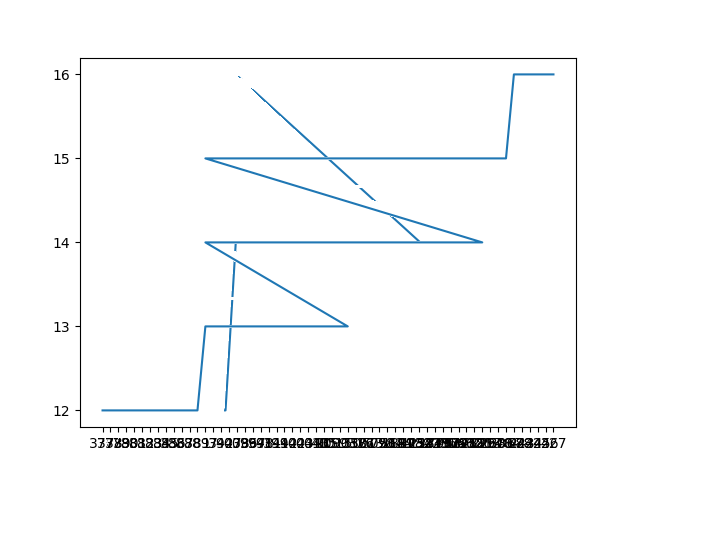

No handles with labels found to put in legend.


12,377


No handles with labels found to put in legend.


12,378


No handles with labels found to put in legend.


12,379


No handles with labels found to put in legend.


12,380


No handles with labels found to put in legend.


12,381


No handles with labels found to put in legend.


12,382


No handles with labels found to put in legend.


12,383


No handles with labels found to put in legend.


12,384


No handles with labels found to put in legend.


12,385


No handles with labels found to put in legend.


12,386


No handles with labels found to put in legend.


12,387


No handles with labels found to put in legend.


12,388


No handles with labels found to put in legend.


12,389


No handles with labels found to put in legend.


13,1


No handles with labels found to put in legend.


13,7


No handles with labels found to put in legend.


13,392


No handles with labels found to put in legend.


13,407


No handles with labels found to put in legend.


13,408


No handles with labels found to put in legend.


13,396


No handles with labels found to put in legend.


13,397


No handles with labels found to put in legend.


13,398


No handles with labels found to put in legend.


13,411


No handles with labels found to put in legend.


13,399


No handles with labels found to put in legend.


13,412


No handles with labels found to put in legend.


13,402


No handles with labels found to put in legend.


13,403


No handles with labels found to put in legend.


13,404


No handles with labels found to put in legend.


13,413


No handles with labels found to put in legend.


13,405


No handles with labels found to put in legend.


13,9090


No handles with labels found to put in legend.


13,10150


No handles with labels found to put in legend.


13,159316


No handles with labels found to put in legend.


14,1


No handles with labels found to put in legend.


14,350


No handles with labels found to put in legend.


14,371


No handles with labels found to put in legend.


14,373


No handles with labels found to put in legend.


14,5056


No handles with labels found to put in legend.


14,7714


No handles with labels found to put in legend.


14,9814


No handles with labels found to put in legend.


14,18125


No handles with labels found to put in legend.


14,18132


No handles with labels found to put in legend.


14,99843


No handles with labels found to put in legend.


14,122795


No handles with labels found to put in legend.


14,138783


No handles with labels found to put in legend.


14,184377


No handles with labels found to put in legend.


14,219725


No handles with labels found to put in legend.


14,237918


No handles with labels found to put in legend.


14,516321


No handles with labels found to put in legend.


14,646203


No handles with labels found to put in legend.


14,1482970


No handles with labels found to put in legend.


15,1


No handles with labels found to put in legend.


15,11148


No handles with labels found to put in legend.


15,223368


No handles with labels found to put in legend.


15,260178


No handles with labels found to put in legend.


16,2


No handles with labels found to put in legend.


16,423


No handles with labels found to put in legend.


16,424


No handles with labels found to put in legend.


16,425


No handles with labels found to put in legend.


16,426


No handles with labels found to put in legend.


16,427


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
temp=[]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
from collections import defaultdict
mydict = defaultdict(int)
lst=[]
lst2=[]
for message in consumer:
    if(message.value=="display"):
        consumer.close()
    else:
        temp=str(message.value).split(',')
        dict1 = {"Key": temp[0],"Value": temp[1]}
        lst.append(temp[1])
        lst2.append(temp[0])
        ax.clear()
        ax.plot(lst,lst2)
        fig.canvas.draw()


        plt.legend()
        plt.show()
        print(message.value)
        
        
        

#Stram Scatter Plot

<IPython.core.display.Javascript object>


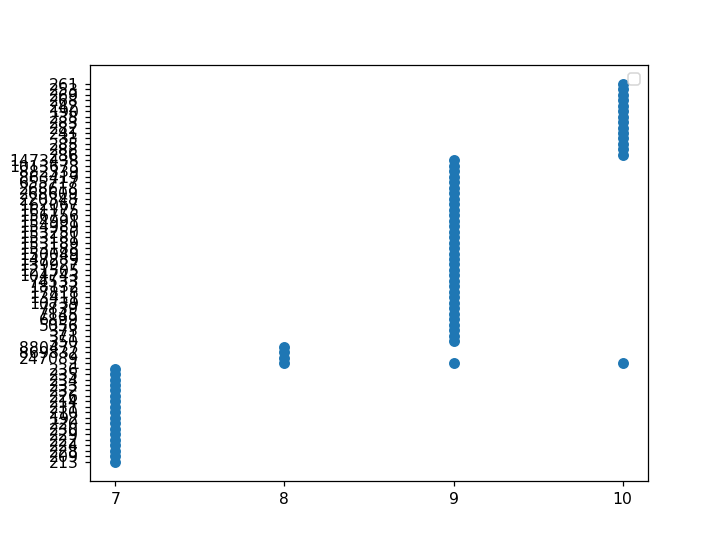

No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,213
7,209


No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,228
7,224


No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,222
7,229


No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,230
7,220


No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,192
7,210


No handles with labels found to put in legend.
No handles with labels found to put in legend.


7,231
7,214


No handles with labels found to put in legend.


7,226


No handles with labels found to put in legend.


7,232


No handles with labels found to put in legend.


7,233


No handles with labels found to put in legend.


7,234


No handles with labels found to put in legend.


7,235


No handles with labels found to put in legend.


7,236


No handles with labels found to put in legend.


8,1


No handles with labels found to put in legend.


8,247089


No handles with labels found to put in legend.


8,869832


No handles with labels found to put in legend.


8,880477


No handles with labels found to put in legend.


9,1


No handles with labels found to put in legend.


9,350


No handles with labels found to put in legend.


9,371


No handles with labels found to put in legend.


9,373


No handles with labels found to put in legend.


9,5056


No handles with labels found to put in legend.


9,6899


No handles with labels found to put in legend.


9,7145


No handles with labels found to put in legend.


9,7839


No handles with labels found to put in legend.


9,10739


No handles with labels found to put in legend.


9,13411


No handles with labels found to put in legend.


9,17818


No handles with labels found to put in legend.


9,18132


No handles with labels found to put in legend.


9,74533


No handles with labels found to put in legend.


9,104743


No handles with labels found to put in legend.


9,121505


No handles with labels found to put in legend.


9,139927


No handles with labels found to put in legend.


9,147289


No handles with labels found to put in legend.


9,150049


No handles with labels found to put in legend.


9,153188


No handles with labels found to put in legend.


9,153189


No handles with labels found to put in legend.


9,153181


No handles with labels found to put in legend.


9,153250


No handles with labels found to put in legend.


9,154989


No handles with labels found to put in legend.


9,154991


No handles with labels found to put in legend.


9,156756


No handles with labels found to put in legend.


9,161175


No handles with labels found to put in legend.


9,162067


No handles with labels found to put in legend.


9,220348


No handles with labels found to put in legend.


9,268609


No handles with labels found to put in legend.


9,268618


No handles with labels found to put in legend.


9,655717


No handles with labels found to put in legend.


9,863419


No handles with labels found to put in legend.


9,882339


No handles with labels found to put in legend.


9,1013673


No handles with labels found to put in legend.


9,1473438


No handles with labels found to put in legend.


10,1


No handles with labels found to put in legend.


10,286


No handles with labels found to put in legend.


10,288


No handles with labels found to put in legend.


10,285


No handles with labels found to put in legend.


10,33


No handles with labels found to put in legend.


10,241


No handles with labels found to put in legend.


10,282


No handles with labels found to put in legend.


10,283


No handles with labels found to put in legend.


10,238


No handles with labels found to put in legend.


10,190


No handles with labels found to put in legend.


10,242


No handles with labels found to put in legend.


10,268


No handles with labels found to put in legend.


10,269


No handles with labels found to put in legend.


10,253


No handles with labels found to put in legend.


10,261


KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
temp=[]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
from collections import defaultdict
mydict = defaultdict(int)
lst=[]
lst2=[]
for message in consumer:
    if(message.value=="display"):
        consumer.close()
    else:
        temp=str(message.value).split(',')
        dict1 = {"Key": temp[0],"Value": temp[1]}
        lst.append(temp[0])
        lst2.append(temp[1])
        ax.clear()
        ax.scatter(lst,lst2)
        fig.canvas.draw()


        plt.legend()
        plt.show()
        print(message.value)
        
        
        

#Analysis Report

In this task we have to visualize stream data reading from database. we studied about dash with plotly and bokeh tool for visualization and also learned abbout web based tool for visualizing kafka streaming like alooma but got stuked with credentials problems and these tools are not open source and got problem with connection of database and thses sources are limited with only line graphs. we learned visualization deeply and implemented multiple graphs as mentioned above.

Tools: Firebase, jupyter , kafka.